# Lab 4: Implementing Decision Tree Algorithm for Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import  pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv("C:\\Users\\hplap\\Labs\\ML_Lab\\bill_authentication.csv")

## EDA Steps

In [3]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
dataset.shape

(1372, 5)

In [5]:
dataset.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
dataset.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Precessing Steps

### Step 1:  Preparing Data into Input Feature and Output Target Class

In [8]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [9]:
print(X.shape)
print(y.shape)

(1372, 4)
(1372,)


### Step 4 : Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                    test_size=0.25,
                                    random_state=0)

### Step 5 : Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

In [12]:
print(X_test)

[[-0.80906482 -2.14852535  2.00805678  0.10249791]
 [ 1.64299264 -0.35291376 -0.2324907   1.09909594]
 [-0.89559047  0.26903381 -0.74542592 -1.25528109]
 ...
 [ 0.28589673  0.41267669  0.21310288  0.68074013]
 [ 1.06867684  0.79339388 -0.45897031  0.35421956]
 [ 1.85277118  0.62760578 -0.85215058  0.45941393]]


## Training the Decision Tree Classification model on the Training set

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion = 'entropy',
    random_state= 0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the Test set results

In [14]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),
                      y_test.reshape(len(y_test),1)),
                     1)[0:10])


print("\n",len(np.concatenate((y_pred.reshape(len(y_pred),1),
                      y_test.reshape(len(y_test),1)),
                     1)))

[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]

 343


## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(y_test.shape)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score (y_test, y_pred)

(343,)
[[189   6]
 [  3 145]]


0.9737609329446064

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(y_test.shape)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n Accuracy of Model :",accuracy_score(y_test, y_pred))
print("\n Precision Score of Model :",precision_score(y_test, y_pred))
print("\n Recall Score of Model :",recall_score(y_test, y_pred))
print("\n F1 Score of Model :",f1_score(y_test, y_pred))


(343,)
[[189   6]
 [  3 145]]

 Accuracy of Model : 0.9737609329446064

 Precision Score of Model : 0.9602649006622517

 Recall Score of Model : 0.9797297297297297

 F1 Score of Model : 0.9698996655518396


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       195
           1       0.96      0.98      0.97       148

    accuracy                           0.97       343
   macro avg       0.97      0.97      0.97       343
weighted avg       0.97      0.97      0.97       343



## Visualising the Training set results

## VISUALIZE TEXT REPRESENTATION

In [18]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_0 <= -0.05
|   |--- feature_1 <= 0.69
|   |   |--- feature_2 <= 1.25
|   |   |   |--- feature_0 <= -0.23
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.23
|   |   |   |   |--- feature_0 <= -0.23
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  -0.23
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  1.25
|   |   |   |--- feature_1 <= -1.14
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  -1.14
|   |   |   |   |--- class: 0
|   |--- feature_1 >  0.69
|   |   |--- feature_0 <= -1.35
|   |   |   |--- feature_3 <= -0.35
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  -0.35
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  -1.35
|   |   |   |--- class: 0
|--- feature_0 >  -0.05
|   |--- feature_0 <= 0.70
|   |   |--- feature_2 <= -0.74
|   |   |   |--- feature_1 <= 0.54
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.54
|   |   |   |   |--- feature_3 <= -2.06
|   |   |   |   |   |--- class: 1

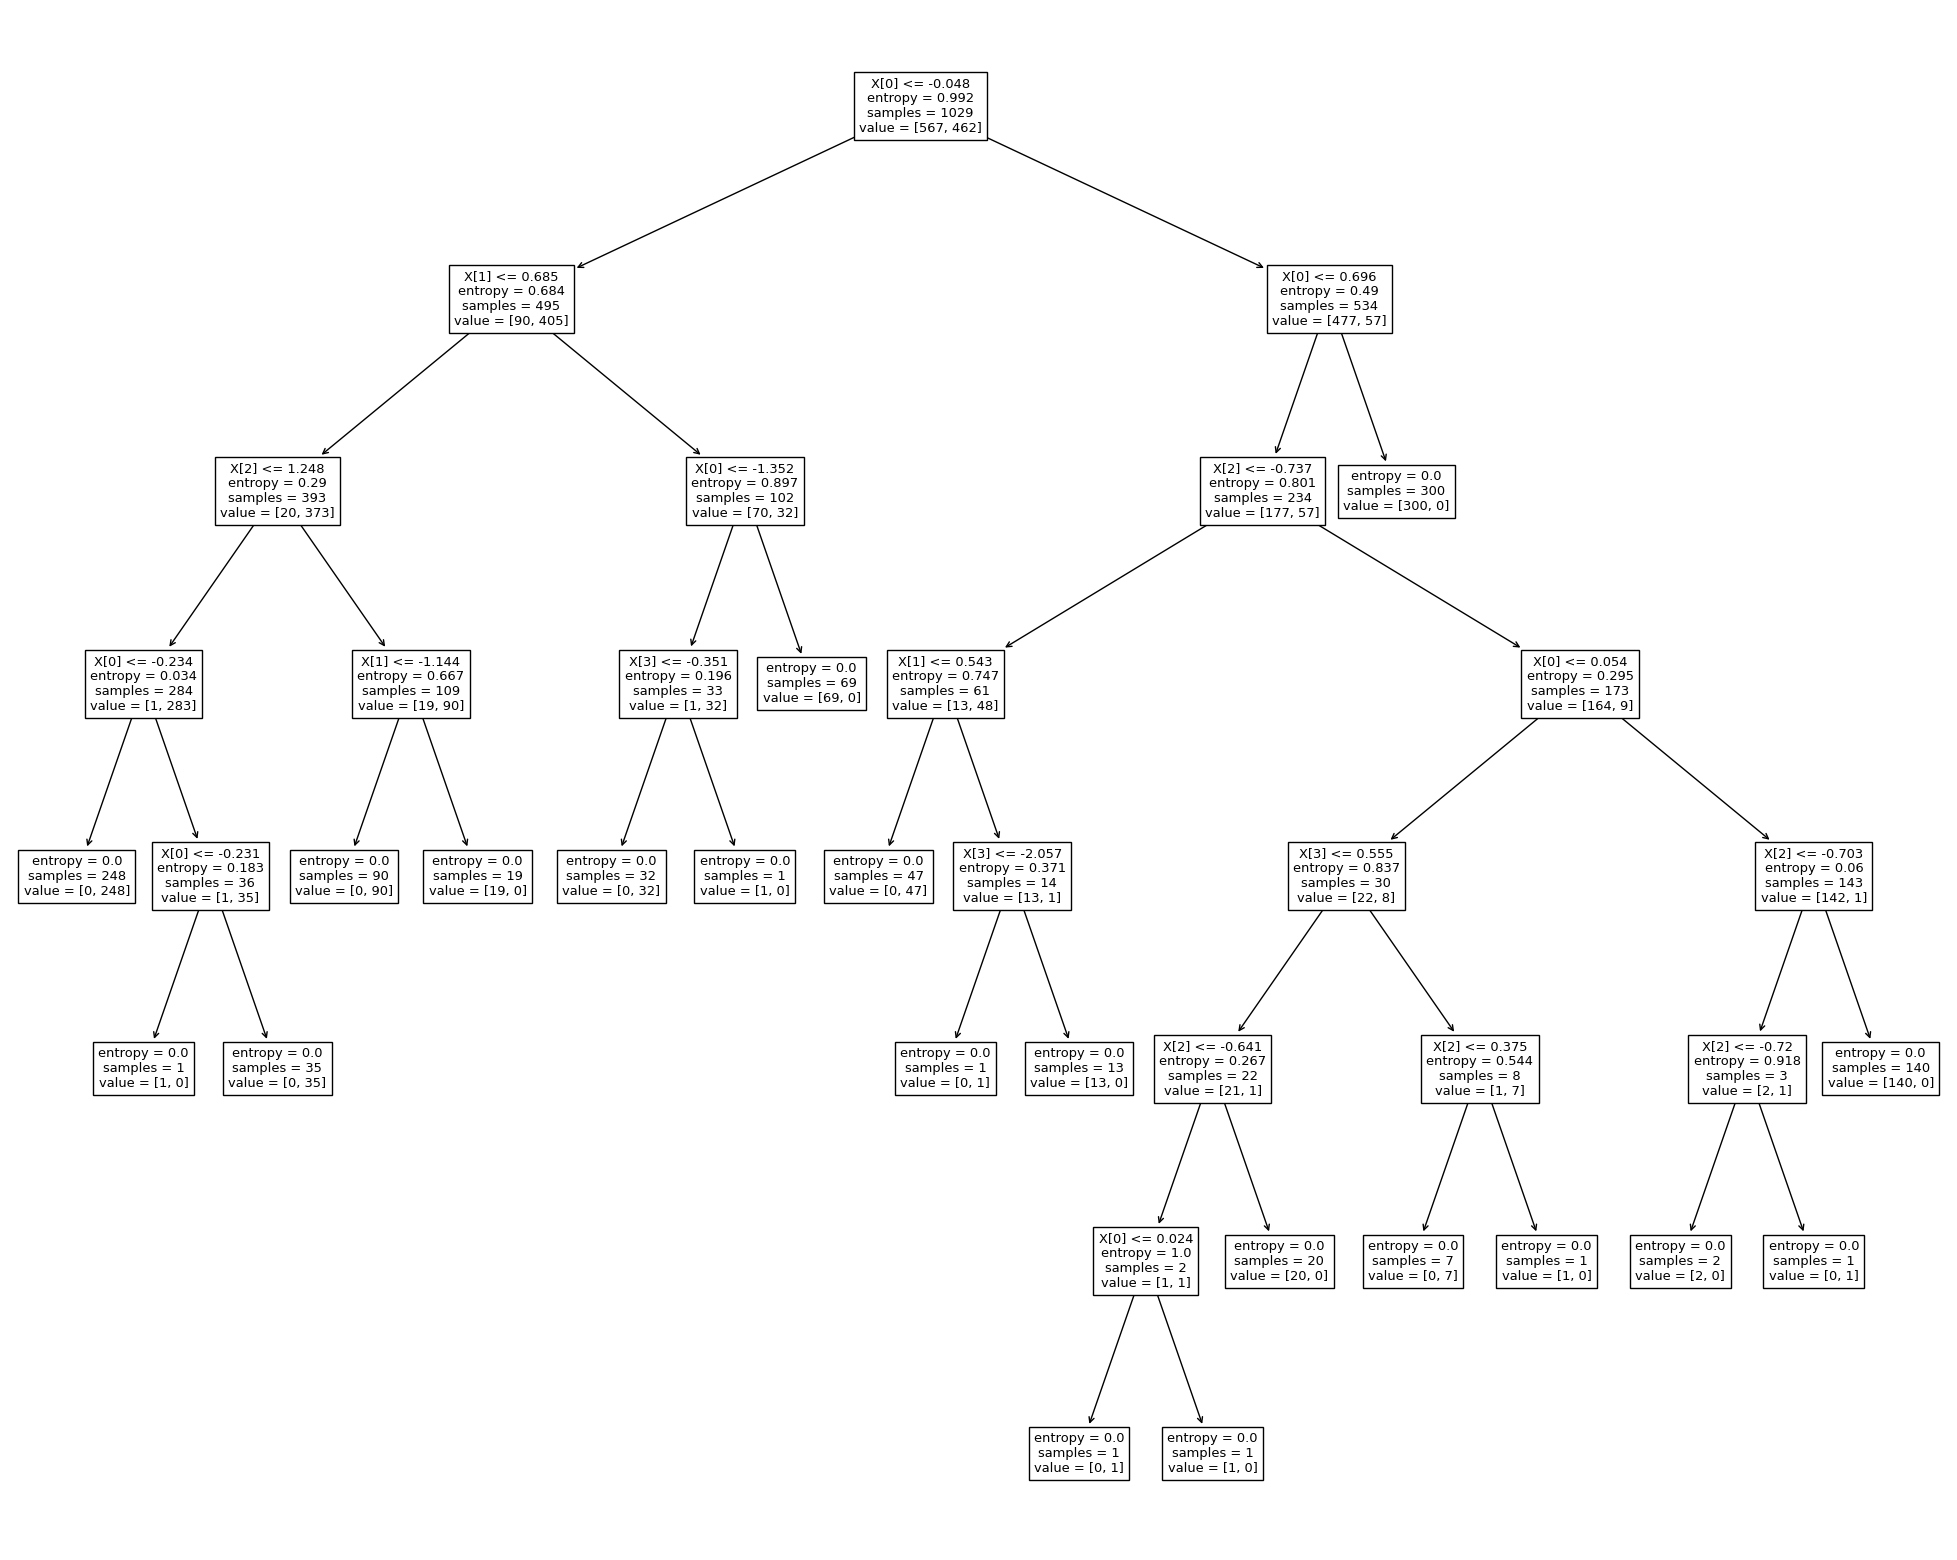

In [19]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier)
plt.show()

## 2.	Create the model with following settings 

a.	Criterion = log_loss  = entropy

b.	Splitter = random 

c.	max_features = sqrt 

d.	random_state = any number of your choice 

Write a code in your .ipynb file and find following result 


In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy',
                                     splitter = 'random',
                                     max_features = 'sqrt',
                                     random_state= 33)

In [21]:
classifier2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=33, splitter='random')

In [22]:
y_pred2 = classifier2.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred2),1),
                      y_test.reshape(len(y_test),1)),
                     1)[0:10])


print("\n",len(np.concatenate((y_pred.reshape(len(y_pred2),1),
                      y_test.reshape(len(y_test),1)),
                     1)))

[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]

 343


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(y_test.shape)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
accuracy_score (y_test, y_pred2)

(343,)
[[193   2]
 [  2 146]]


0.9883381924198251

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(y_test.shape)
c2m = confusion_matrix(y_test, y_pred2)
print(cm2)
print("\n Accuracy of Model :",accuracy_score(y_test, y_pred2))
print("\n Precision Score of Model :",precision_score(y_test, y_pred2))
print("\n Recall Score of Model :",recall_score(y_test, y_pred2))
print("\n F1 Score of Model :",f1_score(y_test, y_pred2))


(343,)
[[193   2]
 [  2 146]]

 Accuracy of Model : 0.9883381924198251

 Precision Score of Model : 0.9864864864864865

 Recall Score of Model : 0.9864864864864865

 F1 Score of Model : 0.9864864864864865


# Visualize the Results by new Model

In [25]:
from sklearn import tree
text_representation = tree.export_text(classifier2)
print(text_representation)

|--- feature_1 <= 1.31
|   |--- feature_2 <= -0.47
|   |   |--- feature_3 <= 0.11
|   |   |   |--- feature_3 <= -0.83
|   |   |   |   |--- feature_2 <= -0.49
|   |   |   |   |   |--- feature_0 <= -0.15
|   |   |   |   |   |   |--- feature_2 <= -1.02
|   |   |   |   |   |   |   |--- feature_1 <= 1.22
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  1.22
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  -1.02
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  -0.15
|   |   |   |   |   |   |--- feature_0 <= 0.81
|   |   |   |   |   |   |   |--- feature_2 <= -0.61
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.53
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_1 >  0.53
|   |   |   |   |   |   |   |   |   |--- feature_2 <= -1.41
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_

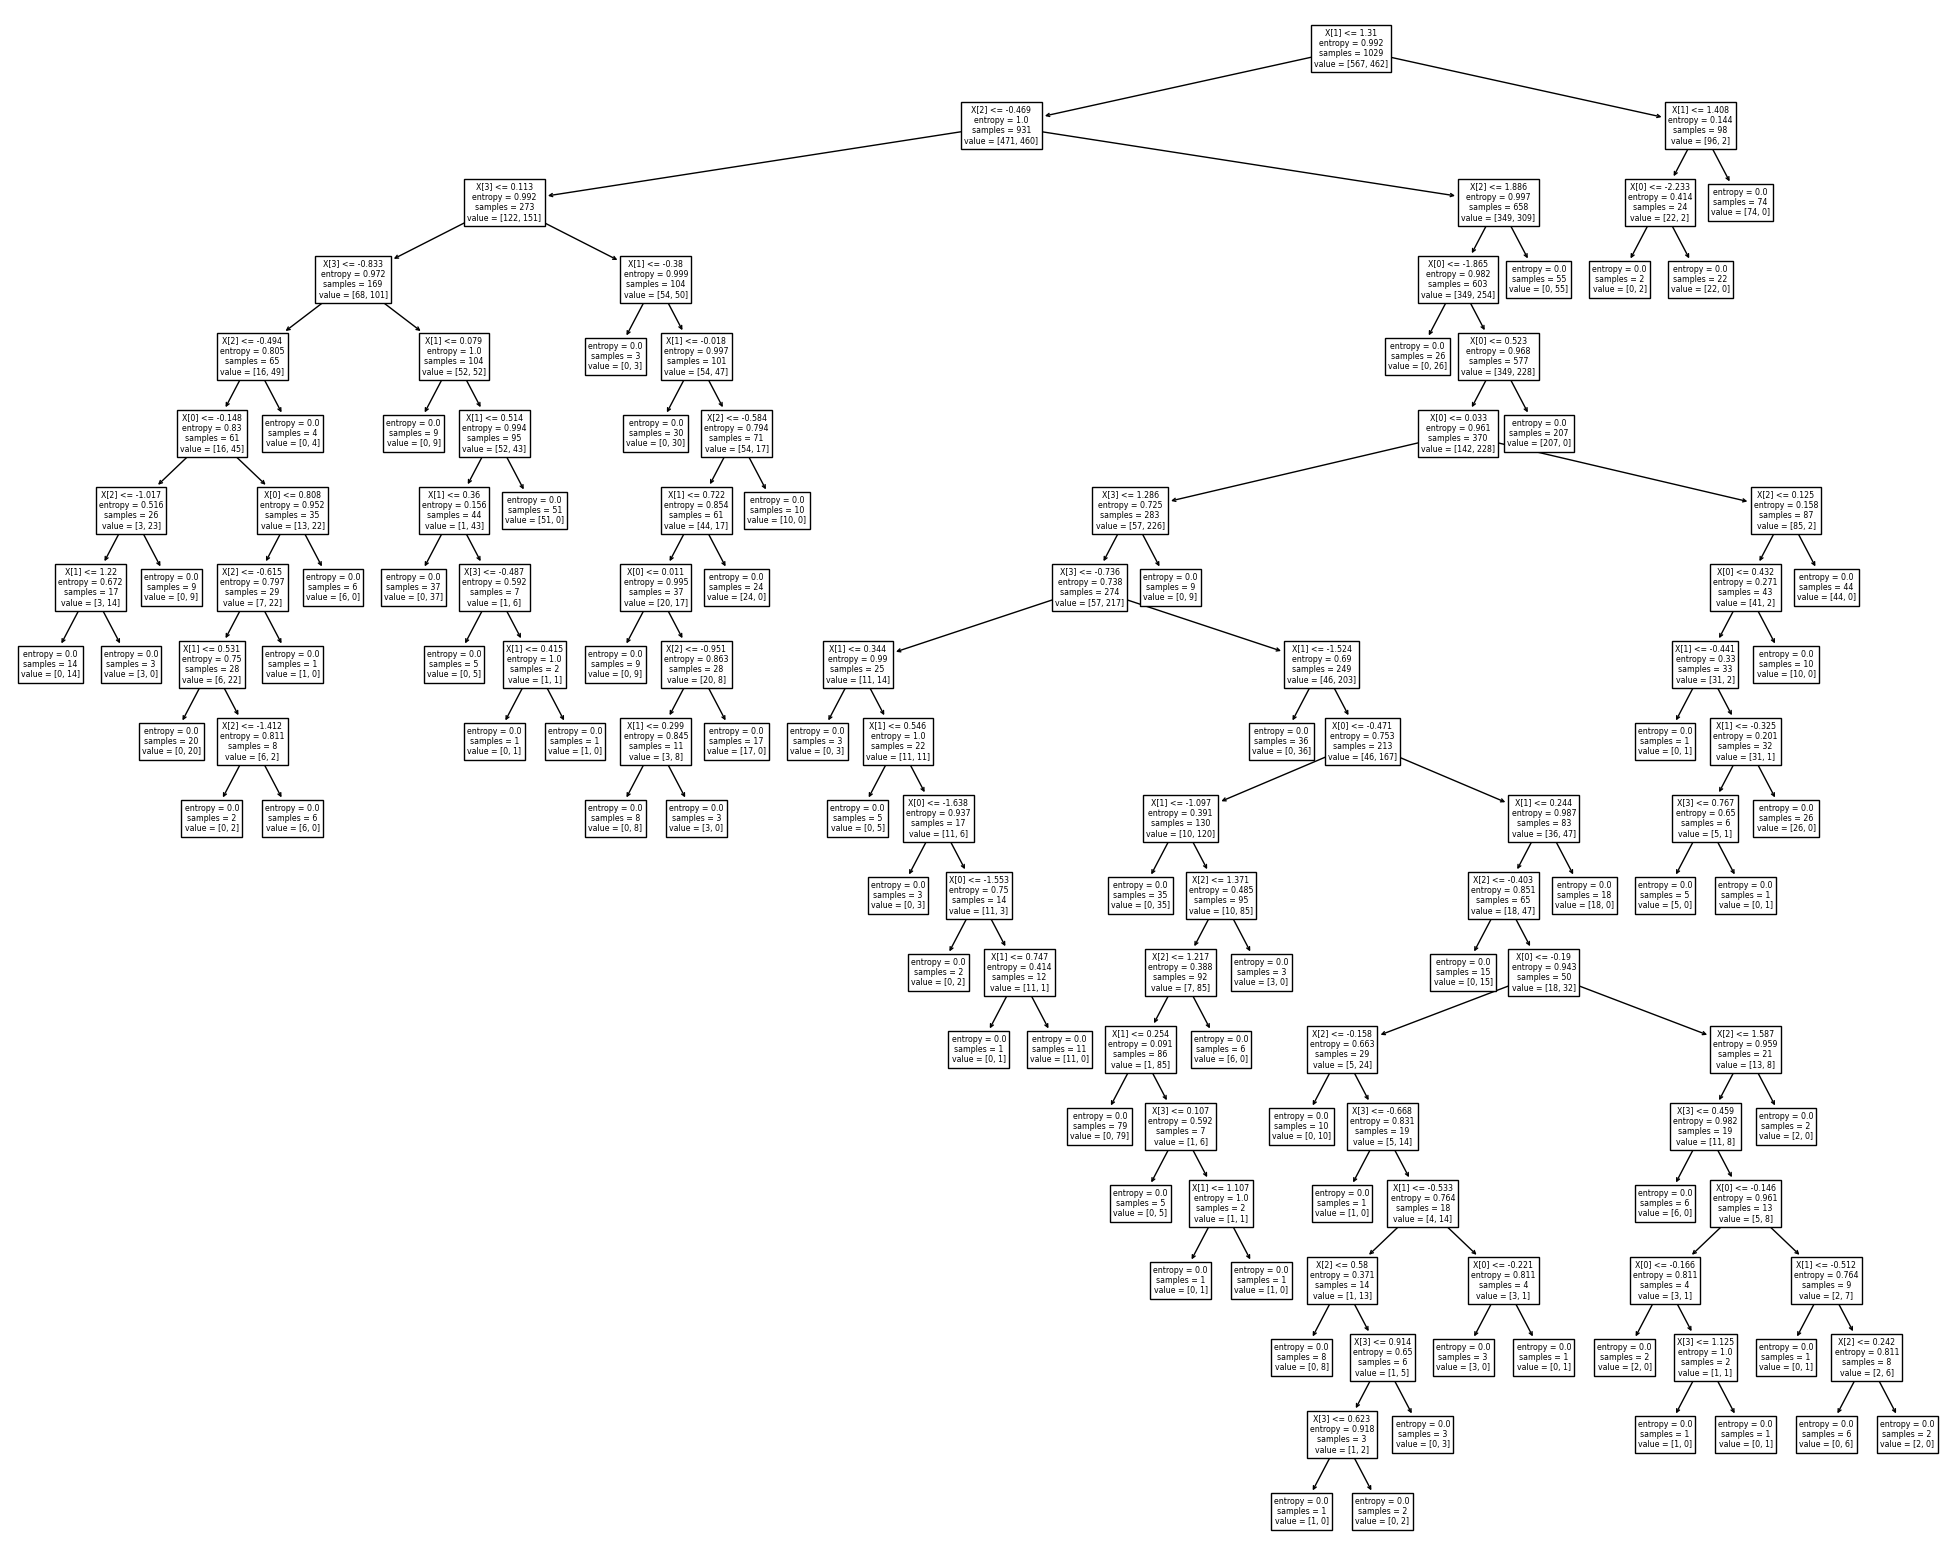

In [26]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier2)
plt.show()